In [1]:
from agents.locobot.active_vision.candidate_selection import SampleGoodCandidates
import os
import json

In [2]:
def load_semantic_json(scene):
    replica_root = '/datasets01/replica/061819/18_scenes'
    habitat_semantic_json = os.path.join(replica_root, scene, 'habitat', 'info_semantic.json')
    with open(habitat_semantic_json, "r") as f:
        hsd = json.load(f)
    if hsd is None:
        print("Semantic json not found!")
    return hsd

def test_samplecandidates_for_class():
    traj_path = '/checkpoint/apratik/data/data/apartment_0/default/no_noise/mul_traj_200/1/'
    labels = ['chair', 'cushion', 'door', 'indoor-plant', 'sofa', 'table']
    
    def is_annot_validfn(annot):
        hsd = load_semantic_json('apartment_0')
        label_id_dict = {}
        for obj_cls in hsd["classes"]:
            if obj_cls["name"] in labels:
                label_id_dict[obj_cls["id"]] = obj_cls["name"]
        if hsd["id_to_label"][annot] < 1 or hsd["id_to_label"][annot] not in label_id_dict.keys():
            return False
        return True
    
    s = SampleGoodCandidates(traj_path, is_annot_validfn)
    c = s.get_n_candidates(6, good=True)
    print(f'good candidates {c}')
    s.visualize(c)
    
    c = s.get_n_candidates(6, good=False)
    print(f'bad candidates {c}')
    s.visualize(c)

144 good candidates found!
good candidates [499, 460, 1081, 258, 279, 1070]


NameError: name 'os' is not defined

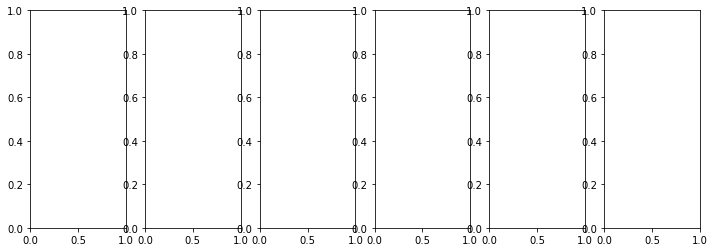

In [3]:
import time
start = time.time()
test_samplecandidates_for_class()
print(f'time taken {time.time()-start}')

start = time.time()
test_samplecandidates_for_class()
print(f'time taken {time.time()-start}')